In [23]:
# =================== 
# 1. 딥러닝 라이브러리 불러오기 

import pandas as pd
# 토크나이저 - 문장은 단어화
from tensorflow.keras.preprocessing.text import Tokenizer
# pad는 모든 문장을 동일한 길이로 맞추는 기능
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Sequential -> 딥러닝 모델을 레고처럼 구축
from tensorflow.keras.models import Sequential
# Embedding -> 단어 -> 가중치화 / Dense 기본 딥러닝 뉴런 구조 / Pooling 
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D, Dropout, LSTM
# train_test_split -> 데이터를 80:20으로 분할
from sklearn.model_selection import train_test_split


In [8]:
# 데이터 로드
data = pd.read_csv('nsmc_train.csv', encoding='utf-8').dropna()
X, y = data['review'], data['rating']


In [9]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
print(f"x트레인 :\n\n {X_train}\n")
print(f"y트레인 : \n\n{y_train}\n")
print(f"x테스트 : \n\n{X_test}\n")
print(f"y테스트 : \n\n{X_test}\n")

x트레인 :

 42645     두개는 줄려고 했는데 알바가 많아서. 아후 볼거없어서 채널 돌려도 다시 다른데로 돌...
104177                                       이렇게까지재미없을수가...
39788        평점 너무한거아닌가?? 그냥 영화는영화일뿐.. 충분히 웃으며 즐길수 있는영화인데..
49687                                       개~~~~노~~~~잼~~~~
47122                                        액션은 조금 봐 줄만 해ㅋ
                                ...                        
119879                                          짱 재밌습니다.^^^
103694    난 완전잼있게 봤는데 평점이 왜이러지?? 마지막 부분 보면서 넘 웃어서 배아플 정도...
131932    그렇게 풋풋했던 사랑이 차갑게식어버렸다니 믿을수 없었다. 하지만 영화후반부에서 그것...
146867                  찬미예수님♥원장수녀님의사랑그리고삶그리고깨달음저희도받고싶습니다.♥
121958                             6.25 전쟁에서 AK-47이 왜나와 -ㅅ-
Name: review, Length: 119994, dtype: object

y트레인 : 

42645     0
104177    0
39788     1
49687     0
47122     0
         ..
119879    1
103694    1
131932    1
146867    1
121958    0
Name: rating, Length: 119994, dtype: int64

x테스트 : 

64257     진짜 죽고싶은 사람만 보세요 정상인이라면 평점 10점은 절대 안나올듯 ~
65513                         영웅이 되고싶겟지만 

In [16]:
# 토큰화 및 패딩
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=50)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=50)


In [ ]:
# 단어 빈도수로 카운팅이 먼저됨
print(X_train_seq)

[[   0    0    0 ... 1561 1853   43]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    6  390 3691]
 ...
 [   0    0    0 ...  693 3510 4019]
 [   0    0    0 ...    0    0  585]
 [   0    0    0 ...    0  986 2143]]


In [26]:
# 모델 구성
model = Sequential([
    Embedding(5000, 64, input_length=50),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# 모델 컴파일
# 모델 컴파일을 변경할 때 // 다른 유형의 딥러닝(다중분류/회귀)모델을 사용할 떄
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
# 학습
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(
    X_train_seq, 
    y_train, 
    epochs=10, 
    batch_size=128, 
    validation_split=0.2, 
    callbacks=[early_stop]
)

# 정상범위 : accuraccy와 val_accuracy가 5%내외일떄 과적합문제는 없음

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.8486 - loss: 0.2741 - val_accuracy: 0.7618 - val_loss: 0.6856
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.8522 - loss: 0.2666 - val_accuracy: 0.7600 - val_loss: 0.6958
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.8544 - loss: 0.2608 - val_accuracy: 0.7626 - val_loss: 0.7544
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.8566 - loss: 0.2554 - val_accuracy: 0.7626 - val_loss: 0.8022


In [39]:
#평가
loss, accuracy = model.evaluate(X_test_seq, y_test)
print(f"loss : {loss}, accuracy: {accuracy}")

938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7570 - loss: 0.8149
loss : 0.8149213790893555, accuracy: 0.7570252418518066


In [40]:
# 예측 테스트
test_text = ["정말 재미있어요!", "별로 였어요", "완전 재밌다", "흠...이건 좀..", "이게 뭐야", "개꿀잼"]
for text in test_text:
    seq = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=50)
    pred = model.predict(seq)[0][0]
    print(f"{text} → {'긍정' if pred > 0.8 else '부정'} ({pred:.3f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
정말 재미있어요! → 긍정 (0.997)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
별로 였어요 → 부정 (0.019)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
완전 재밌다 → 긍정 (0.992)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
흠...이건 좀.. → 부정 (0.032)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
이게 뭐야 → 부정 (0.052)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
개꿀잼 → 긍정 (0.997)


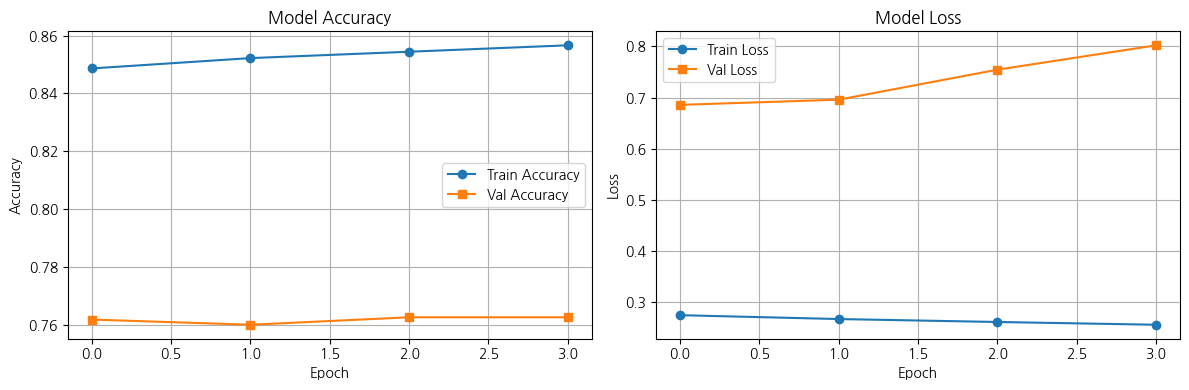

그래프 저장 완료: training_history.png


In [41]:
import matplotlib.pyplot as plt      # 시각화 라이브러리
import matplotlib                    # matplotlib 기본 설정용
import koreanize_matplotlib           # 한글 깨짐 방지


# 결과 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# 정확도 그래프
axes[0].plot(history.history['accuracy'], label='Train Accuracy', marker='o')
axes[0].plot(history.history['val_accuracy'], label='Val Accuracy', marker='s')
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True)

# 손실 그래프
axes[1].plot(history.history['loss'], label='Train Loss', marker='o')
axes[1].plot(history.history['val_loss'], label='Val Loss', marker='s')
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.savefig('training_history.png', dpi=150)
plt.show()
print("그래프 저장 완료: training_history.png")